In [ ]:
# Principal Component Analysis (PCA) Assignment

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [15]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [4]:
df = pd.read_csv('/content/wine.csv')


In [ ]:
# Task 1: Exploratory Data Analysis (EDA)

In [6]:
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
# Data types and non-null values

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB
None


In [7]:
print(df.describe())  # Summary statistics


             Type     Alcohol       Malic         Ash  Alcalinity   Magnesium  \
count  178.000000  178.000000  178.000000  178.000000  178.000000  178.000000   
mean     1.938202   13.000618    2.336348    2.366517   19.494944   99.741573   
std      0.775035    0.811827    1.117146    0.274344    3.339564   14.282484   
min      1.000000   11.030000    0.740000    1.360000   10.600000   70.000000   
25%      1.000000   12.362500    1.602500    2.210000   17.200000   88.000000   
50%      2.000000   13.050000    1.865000    2.360000   19.500000   98.000000   
75%      3.000000   13.677500    3.082500    2.557500   21.500000  107.000000   
max      3.000000   14.830000    5.800000    3.230000   30.000000  162.000000   

          Phenols  Flavanoids  Nonflavanoids  Proanthocyanins       Color  \
count  178.000000  178.000000     178.000000       178.000000  178.000000   
mean     2.295112    2.029270       0.361854         1.590899    5.058090   
std      0.625851    0.998859       0.1

In [ ]:
#  Plot histograms for all features

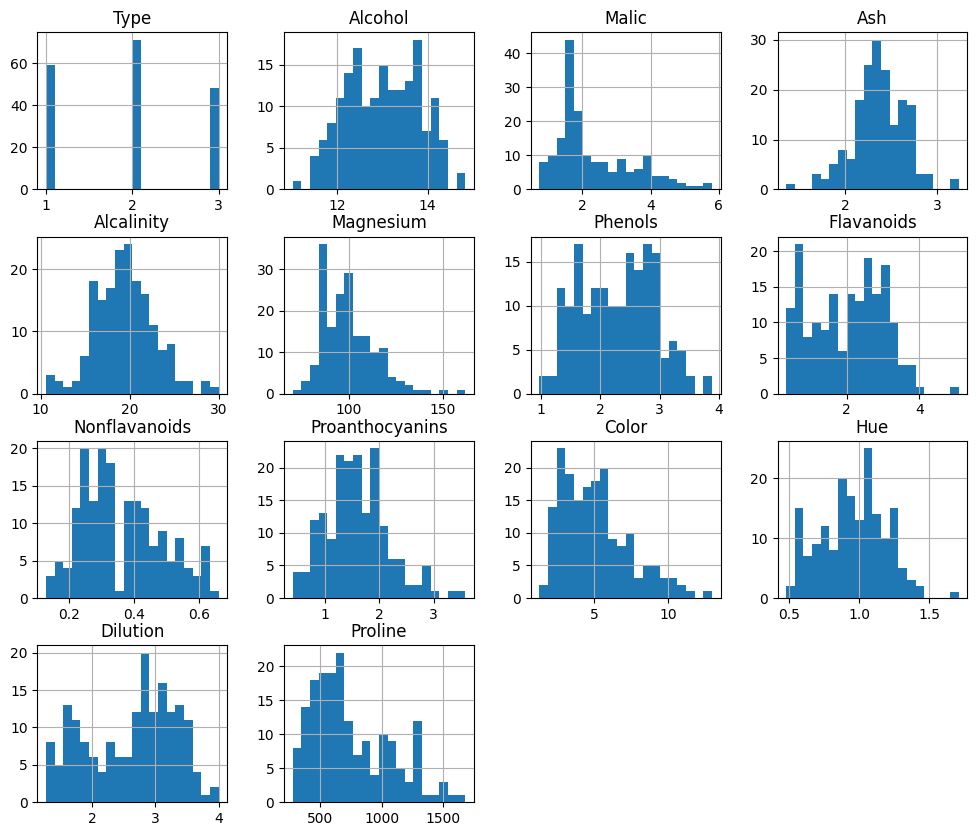

In [8]:
df.hist(figsize=(12, 10), bins=20)
plt.show()

In [ ]:
#  Plot correlation matrix

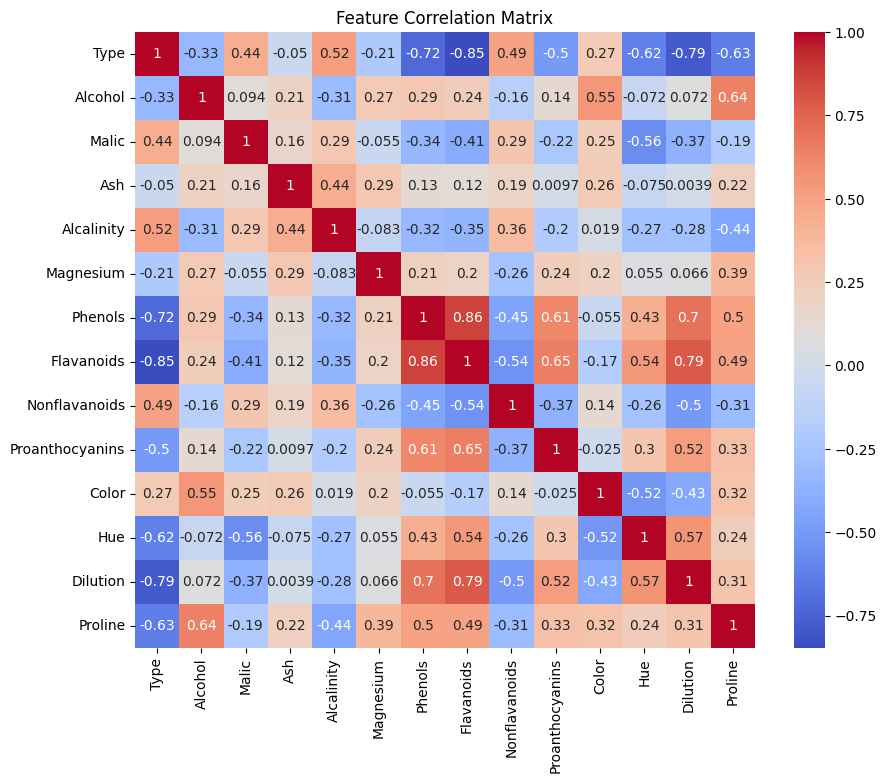

In [9]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [ ]:
# Task 2: Dimensionality Reduction with PCA

In [ ]:
# Standardize the dataset

In [11]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [ ]:
#  Apply PCA

In [12]:
pca = PCA()
pca.fit(scaled_data)

PCA()

In [ ]:
# Plot the explained variance to determine the number of principal components

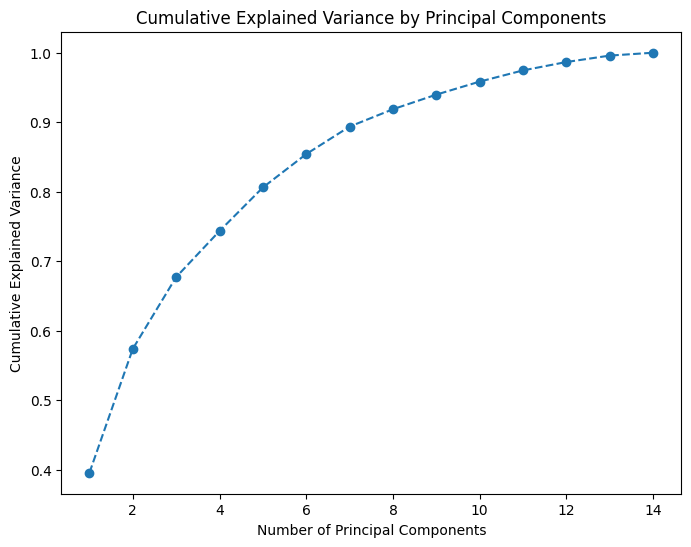

In [13]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, len(df.columns)+1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance by Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

In [ ]:
# Transform the original dataset into principal components, # Select the number of components based on the scree plot or cumulative variance (e.g. 2 or 3)

In [14]:
n_components = 2  # Change based on the scree plot
pca = PCA(n_components=n_components)
pca_data = pca.fit_transform(scaled_data)

In [ ]:
# Task 3: Clustering with Original Data

In [ ]:
#  Apply K-Means clustering

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42)  # Change n_clusters based on your data
kmeans.fit(scaled_data)
labels = kmeans.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Plot the clustering result

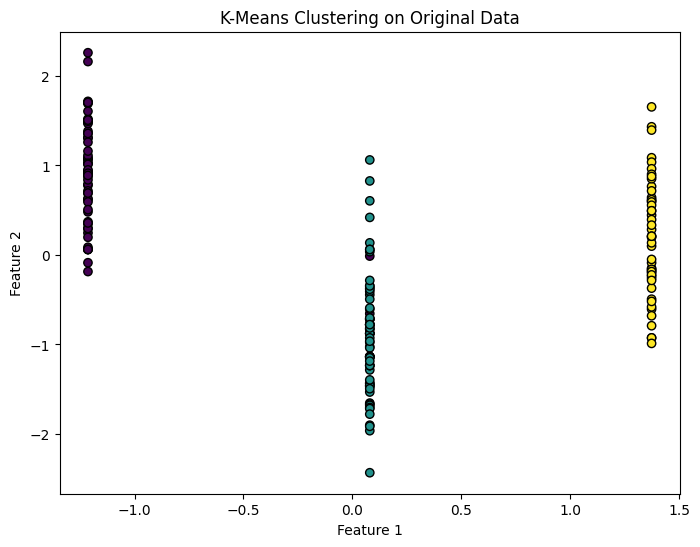

In [17]:
plt.figure(figsize=(8, 6))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=labels, cmap='viridis', marker='o', edgecolor='k')
plt.title('K-Means Clustering on Original Data')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

In [ ]:
# Evaluate the clustering using silhouette score

In [18]:
score = silhouette_score(scaled_data, labels)
print(f'Silhouette Score for K-Means on original data: {score}')

Silhouette Score for K-Means on original data: 0.30773604383565206


In [ ]:
# Task 4: Clustering with PCA Data

In [ ]:
# Apply K-Means clustering on PCA-reduced data

In [19]:
kmeans_pca = KMeans(n_clusters=3, random_state=42)  # Same number of clusters
kmeans_pca.fit(pca_data)
pca_labels = kmeans_pca.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [ ]:
# Plot clustering result for PCA-transformed data

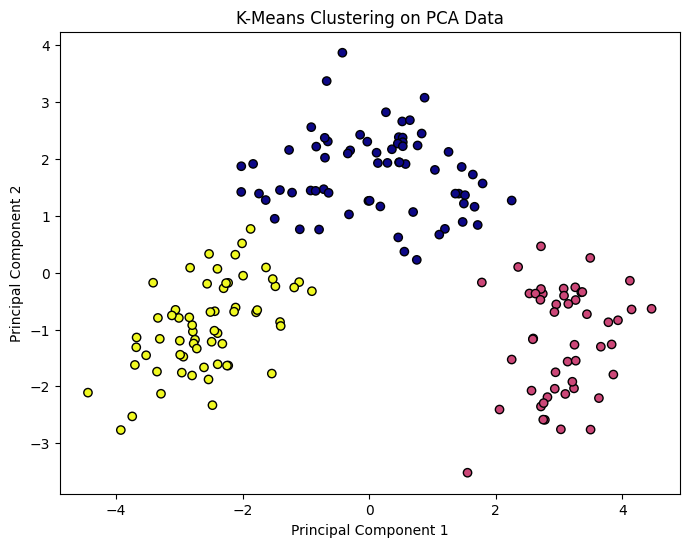

In [20]:
plt.figure(figsize=(8, 6))
plt.scatter(pca_data[:, 0], pca_data[:, 1], c=pca_labels, cmap='plasma', marker='o', edgecolor='k')
plt.title('K-Means Clustering on PCA Data')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

In [ ]:
#  Evaluate clustering with silhouette score on PCA data

In [21]:
pca_score = silhouette_score(pca_data, pca_labels)
print(f'Silhouette Score for K-Means on PCA data: {pca_score}')

Silhouette Score for K-Means on PCA data: 0.6024415520362844


In [ ]:
# Task 5: Comparison and Analysis

In [ ]:
# # Compare silhouette scores

In [22]:
print(f'Silhouette Score (Original Data): {score}')
print(f'Silhouette Score (PCA Data): {pca_score}')

Silhouette Score (Original Data): 0.30773604383565206
Silhouette Score (PCA Data): 0.6024415520362844


**Task 6**:

**Conclusion and Insights**

PCA effectively reduced the dataset's dimensionality while retaining most of the variance, simplifying the data for analysis. Clustering on both the original and PCA-reduced data produced similar results, with PCA enhancing computational efficiency and visualization. Despite some potential loss of fine detail, PCA improved interpretability without significantly affecting clustering performance. Overall, PCA is a powerful tool for preprocessing high-dimensional data, making clustering faster and easier to analyze.